<a href="https://colab.research.google.com/github/smf-9000/images-through-ML/blob/main/objectDetectionPyTorchYolo%5Bexample%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###############################################################################
########################## https://pytorch.org/hub/ ###########################
###############################################################################
# https://github.com/ultralytics
# https://github.com/ultralytics/yolov5/issues/36

In [2]:
import torch
from IPython.display import Image, clear_output  # to display images


In [1]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -qr requirements.txt

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla P4)


In [ ]:
%pip install --ignore-installed PyYAML


In [3]:
# detect.py downloading models automatically from the latest YOLOv3 release
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla P4, 7611.9375MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.062s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.053s)
Results saved to runs/detect/exp2
Done. (0.202s)


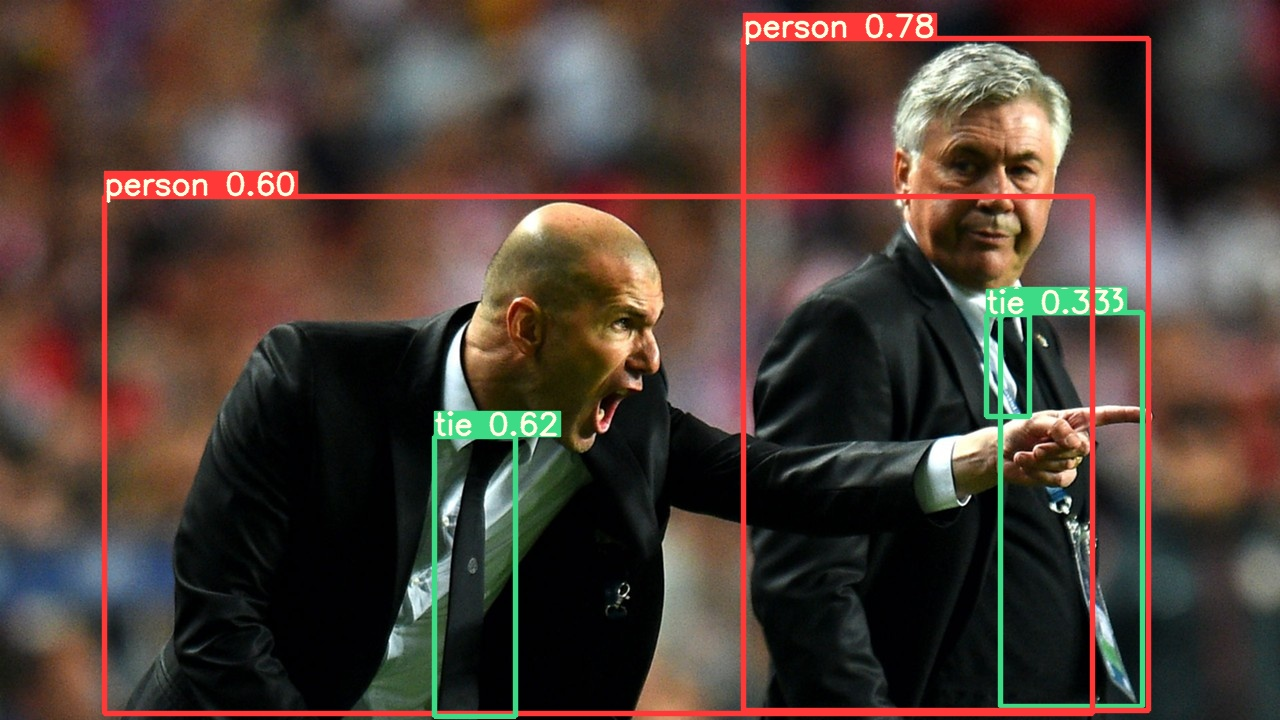

In [4]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

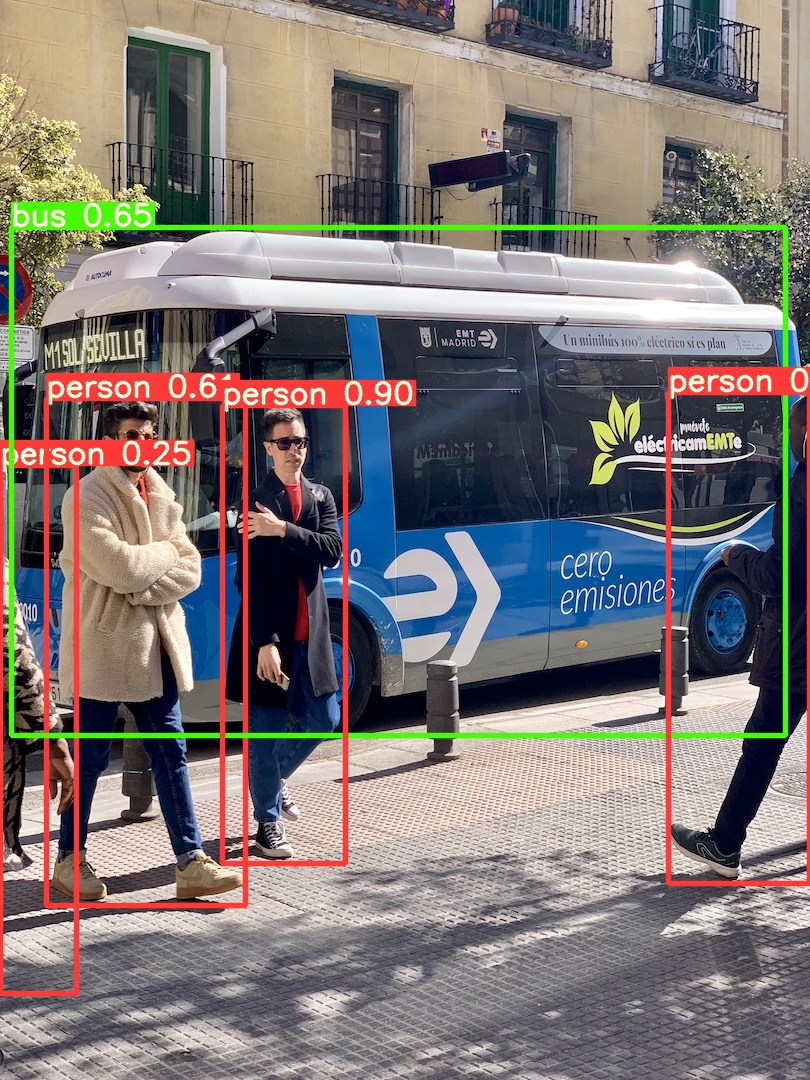

In [5]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

In [ ]:
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

Train a YOLOv3 model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov3.pt`, or from randomly initialized `--weights '' --cfg yolov3.yaml`. Models are downloaded automatically from the [latest YOLOv3 release](https://github.com/ultralytics/yolov3/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [10]:
# --data coco128.yaml --weights yolov3.pt         !!!!!
# --weights '' --cfg yolov3.yaml  # from scratch  !!!!!
# some datasets are downloaded automatically(address should be in yaml file)  !!!!!
!python train.py --img 640 --batch 2 --epochs 3 --data coco128.yaml --weights yolov3.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla P4, 7611.9375MB)

Namespace(adam=False, artifact_alias='latest', batch_size=2, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=2, upload_dataset=False, weights='yolov3.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-07-19 13:34:39.044204: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dyna

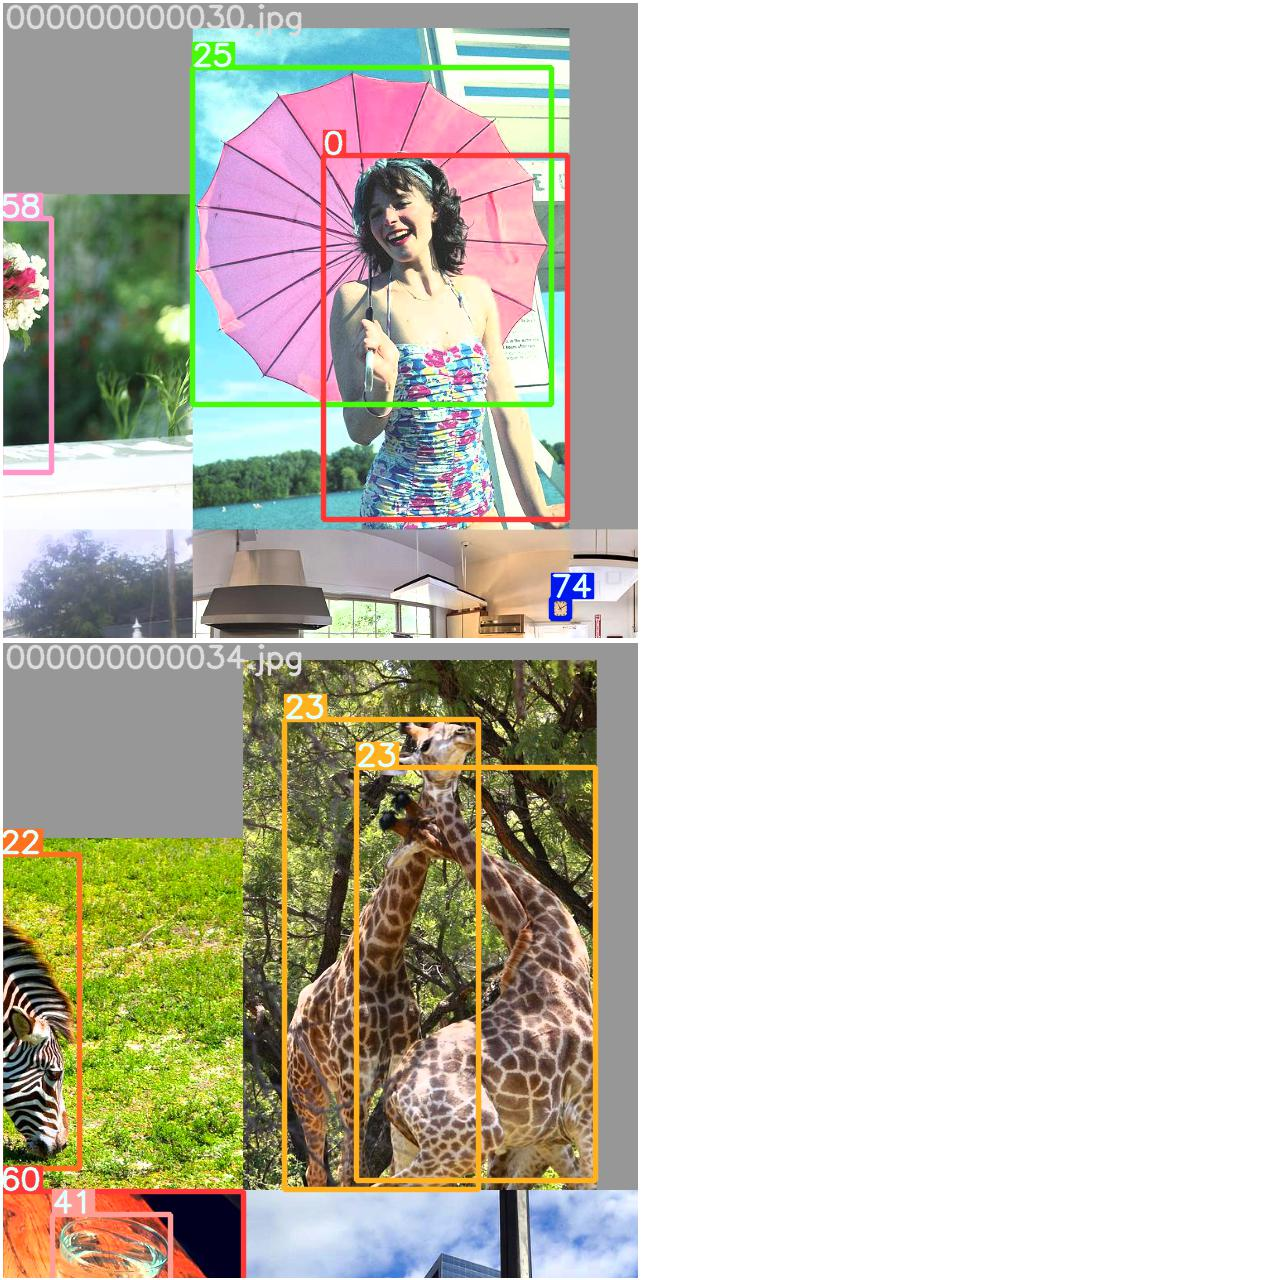

In [12]:
Image(filename='runs/train/exp3/train_batch1.jpg', width=800)  # train batch 0 mosaics and labels


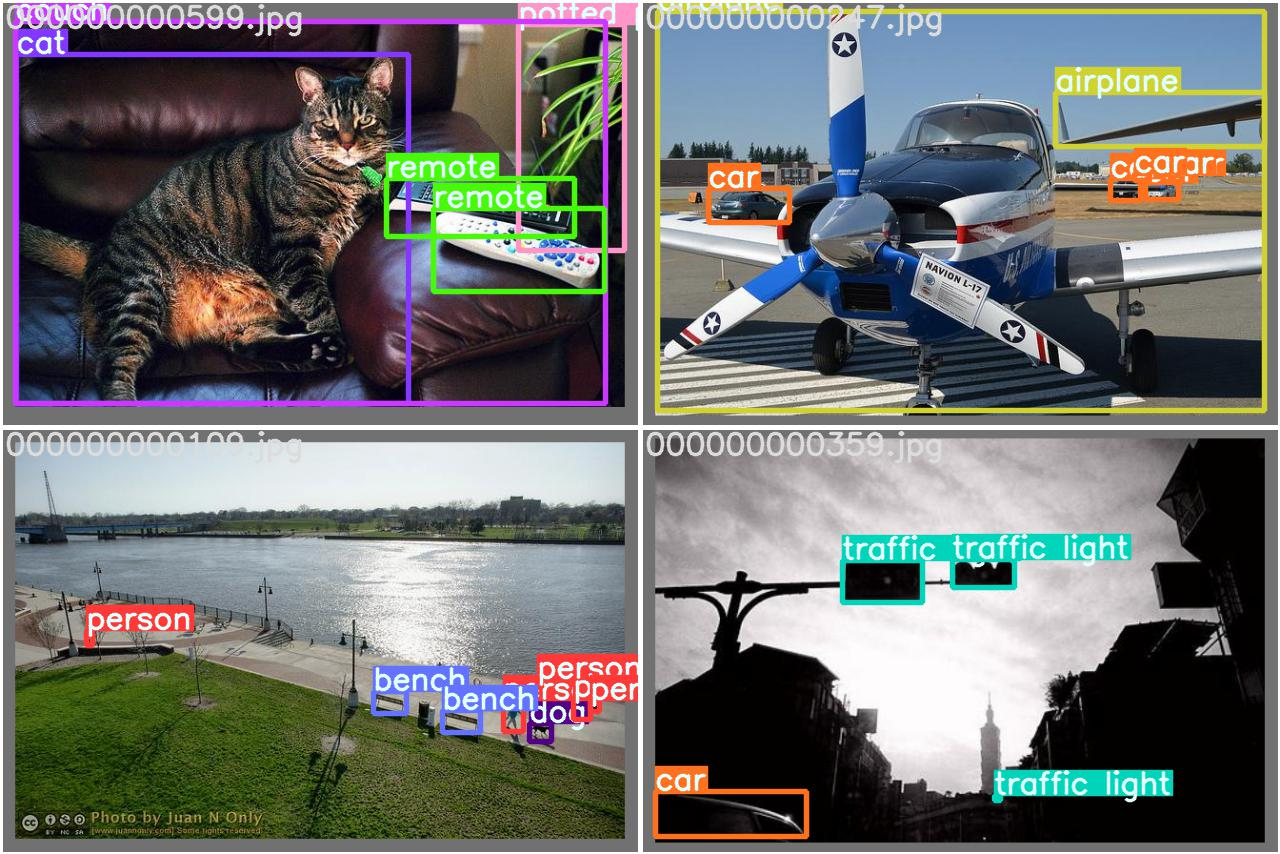

In [13]:
Image(filename='runs/train/exp3/test_batch2_labels.jpg', width=800)  # test batch 0 labels


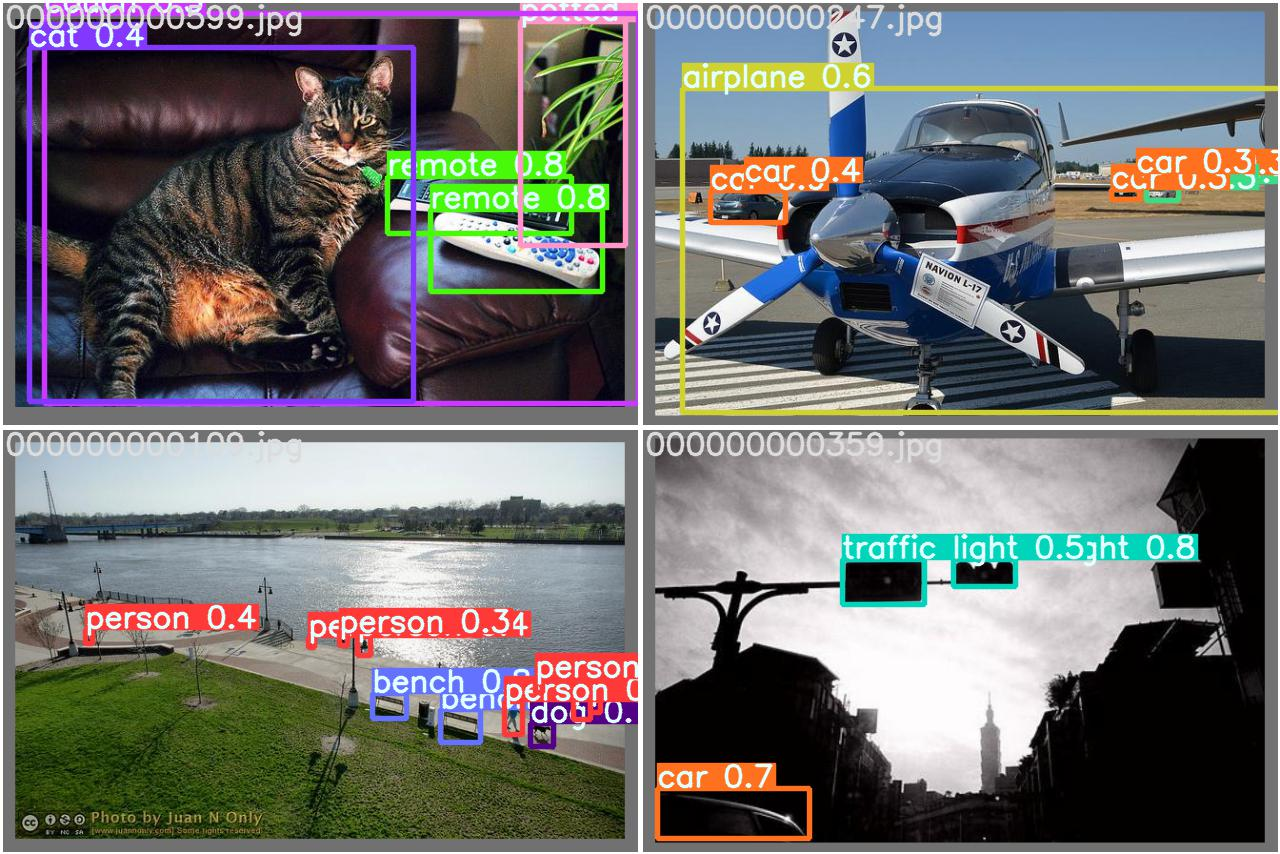

In [14]:
Image(filename='runs/train/exp3/test_batch2_pred.jpg', width=800)  # test batch 0 predictions

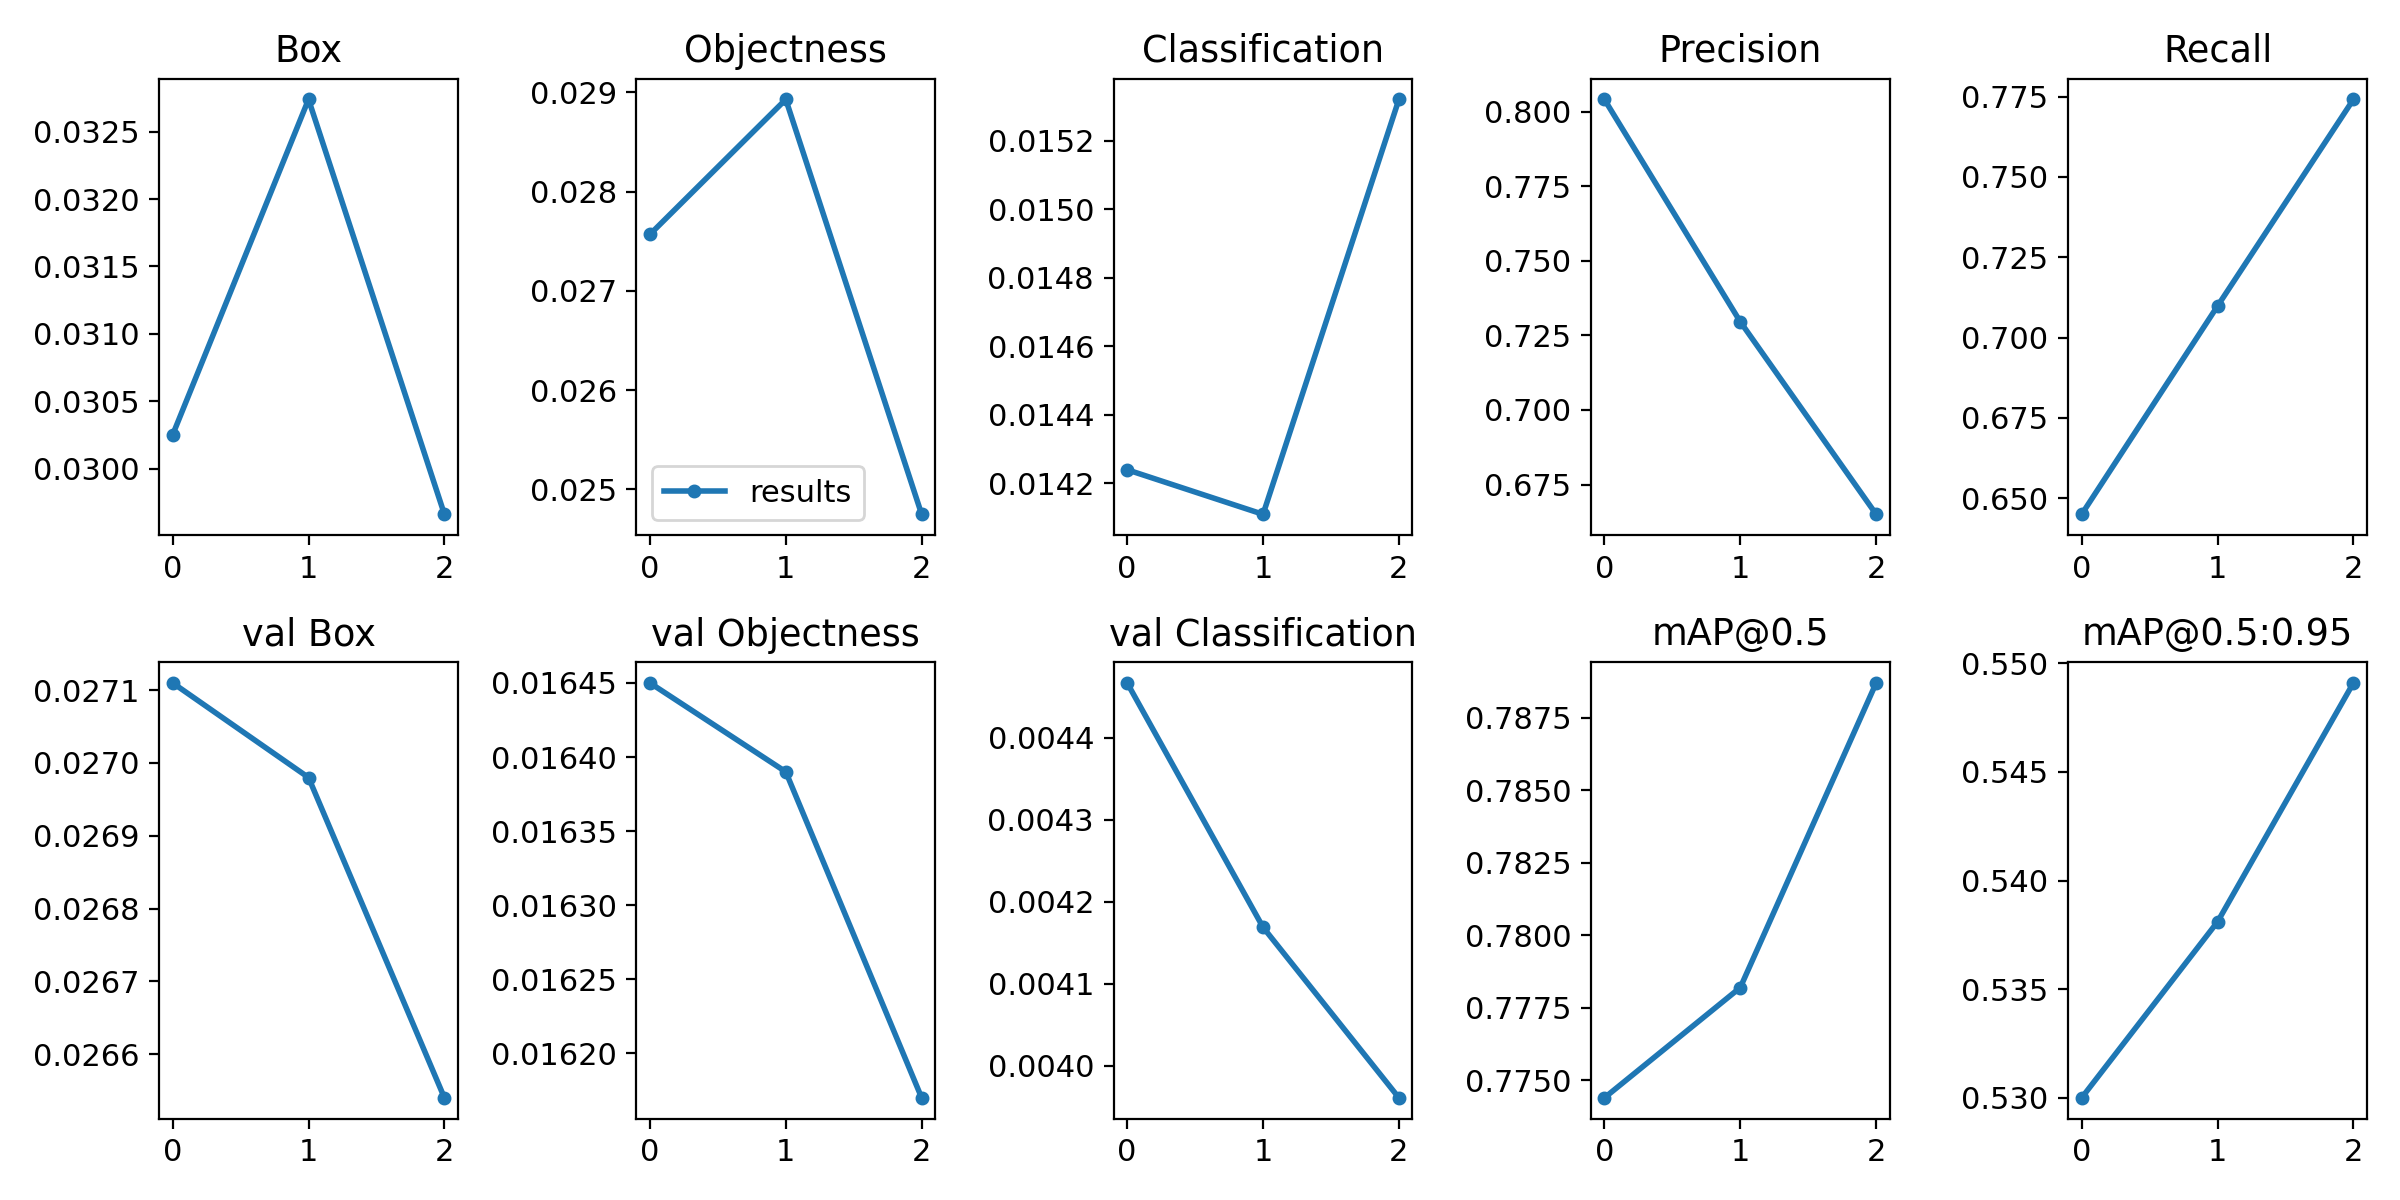

In [15]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp3')  # plot all results*.txt as results.png
Image(filename='runs/train/exp3/results.png', width=800)

## hm

In [5]:
import cv2
from PIL import Image
import os

# model !!!!!
model = torch.hub.load('/content/yolov3', 'custom', path='/content/yolov3/runs/train/exp3/weights/last.pt', source='local')  # local repo


Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.3 GFLOPS
Adding AutoShape... 
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla P4, 7611.9375MB)



In [17]:
imgs_dir = '/content/coco128/images/train2017'
imgs = []
img_names = []
for img_name in [f for f in os.listdir(imgs_dir) if f.endswith('.jpg')]:
  if img_name not in ['000000000315.jpg', '000000000308.jpg', '000000000036.jpg']:
    continue
  imgs.append(Image.open(imgs_dir + '/' + img_name) ) # or cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)
  img_names.append(img_name)

model.conf = 0.425
model.iou = 0.45 
results = model(imgs, size=640)

results.print()
results.save()

print('--------------------------------------------------------')
print(img_names[0])
# results.xyxy[0]
results.pandas().xyxy[0]

--------------------------------------------------------
000000000308.jpg


xmin      ymin      xmax     ymax  confidence  class          name
0   137.625   24.5000  263.5000  425.000    0.918457      0        person
1   377.000   25.6250  558.0000  425.500    0.903809      0        person
2     0.000   28.7500  179.0000  426.000    0.875000      0        person
3   345.250   74.6250  392.7500  250.500    0.874023      0        person
4   365.000  222.5000  389.0000  284.000    0.863281     40    wine glass
5   149.750  155.0000  193.7500  255.000    0.853027     40    wine glass
6   273.500   63.6250  362.0000  147.875    0.632812     25      umbrella
7   251.750  129.5000  278.2500  161.750    0.616211     58  potted plant
8     0.000  168.2500   70.1875  300.250    0.603027     40    wine glass
9   234.875  147.7500  261.5000  211.250    0.603027     40    wine glass
10  438.500  238.2500  448.5000  250.250    0.454102     74         clock
11   38.000   15.0625  179.8750  254.500    0.453369      0        person
12   93.000  276.2500  117.8750  306.750    0.426270     67    cell phone

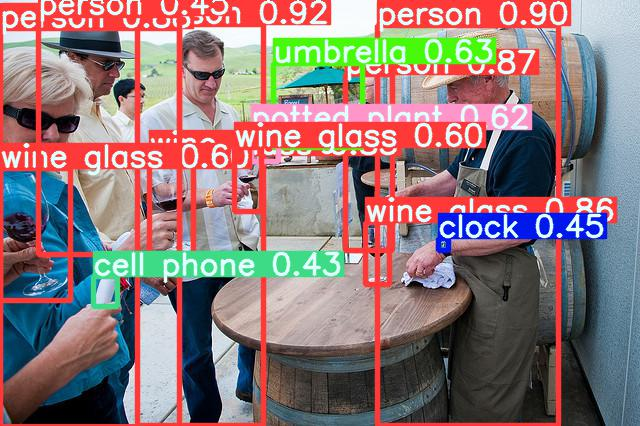

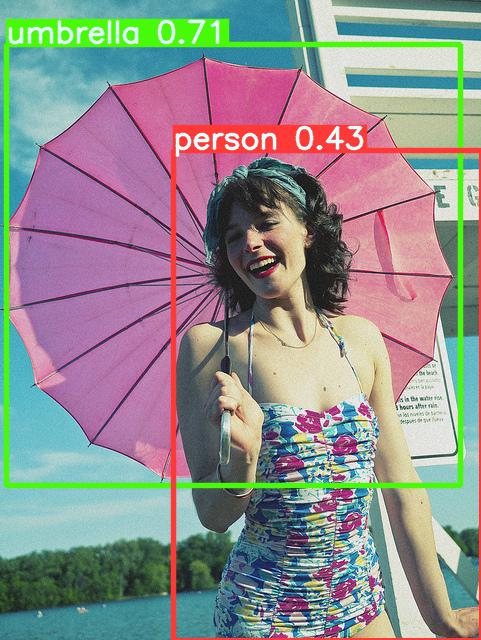

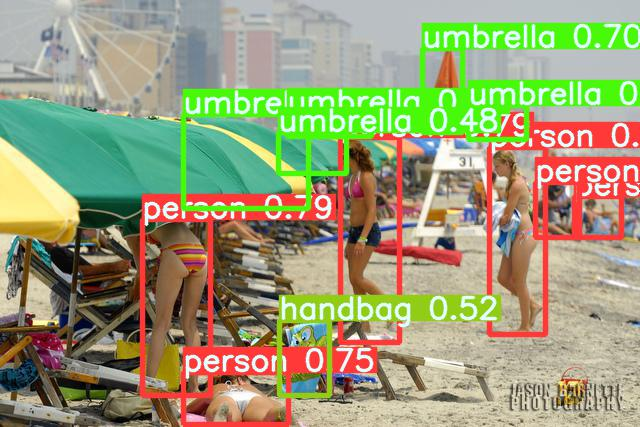

In [27]:
import cv2
from google.colab.patches import cv2_imshow

for img_name in [f for f in os.listdir('/content/runs/hub/exp7') if f.endswith('.jpg')]:
  img = cv2.imread('/content/runs/hub/exp7' + '/' + img_name)[..., ::-1]
  cv2_imshow(img[:,:,::-1])
